# Phase 1 -  Data Wrangling 
###  First we need to read and explore each dataset, find any "bad formatation" or null value.
    Dataset:  PEA07-Estimated_Pupulation-1996-2017.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as py

%matplotlib inline
# ingnor warnings
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
#Load variables with Datasets path:
pea07="PEA07-Estimated_Pupulation-1996-2017.csv"
pea04="PEA04-Estimated_Pupulation-2011-2023.csv" 
cjq01="CJQ01-recorded_crime_2002-2022.csv"

# the fist dataset will be pop01_df
pop01_df=pd.read_csv(pea07)
pop01_df.head()


,Statistic,Age Group,Sex,Year,UNIT,State,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West
0,Estimated Population (Persons in April),All ages,Both sexes,1996,Thousand,3626.1,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6
1,Estimated Population (Persons in April),All ages,Both sexes,1997,Thousand,3664.3,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1
2,Estimated Population (Persons in April),All ages,Both sexes,1998,Thousand,3703.1,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8
3,Estimated Population (Persons in April),All ages,Both sexes,1999,Thousand,3741.6,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3
4,Estimated Population (Persons in April),All ages,Both sexes,2000,Thousand,3789.5,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1


## Dropping unicessary columns, and rename the other ones.
     To prevent any error if run this cell twice, we can create a function to rename columns.
     
     After that, we can organize the columns using the method loc, it is used to select a subset of rows and columns from a DataFrame.



In [3]:
# This funcion receive the variables: df = dataset, old_col = original column name  and  new_col = new column name.
# It  tries to rename the column, if the column doenst exist or it is alread renamed it will go to except.

def rename_col(df, old_col, new_col):
  try:
    df = df.rename(columns={old_col: new_col})
    return df
  except KeyError:
    print(f"Column {column} does not exist or has already been renamed.")
    pass


# lets call the function passiing the parameters
pop01_df = rename_col(pop01_df, 'State', 'Total')


# Now the coluumn is renamed, Lets get the columns in the right local and right name.
pop01_df = pop01_df.loc[:,['Year', 'Border',
       'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West', 'South-East',
       'South-West', 'Total', 'UNIT']]

# showing the first 5 rowns of the dataset
pop01_df.head()



,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,Thousand
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,Thousand
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,Thousand
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,Thousand
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,Thousand


# Analyzing the dataset 


    We can use the method '.info and .isnull to check some information about the dataset.
    

In [4]:
pop01_df.info(), pop01_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        22 non-null     int64  
 1   Border      22 non-null     float64
 2   Midland     22 non-null     float64
 3   West        22 non-null     float64
 4   Dublin      22 non-null     float64
 5   Mid-East    22 non-null     float64
 6   Mid-West    22 non-null     float64
 7   South-East  22 non-null     float64
 8   South-West  22 non-null     float64
 9   Total       22 non-null     float64
 10  UNIT        22 non-null     object 
dtypes: float64(9), int64(1), object(1)
memory usage: 2.0+ KB


(None, (22, 11))

In [5]:
pop01_df.isnull().sum() 

Year          0
Border        0
Midland       0
West          0
Dublin        0
Mid-East      0
Mid-West      0
South-East    0
South-West    0
Total         0
UNIT          0
dtype: int64


# Cleaning the second dataset:
      dataset: PEA04-Estimated_Pupulation-2011-2023.csv

In [6]:
# pandas and numpy already imported at the begining of this notebook
pop02_df = pd.read_csv(pea04)
pop02_df



,STATISTIC,Year,Age Group,Sex,UNIT,State,Border,West,Mid-West,South-East,South-West,Dublin,Mid-East,Midland
0,Estimated Population (Persons in April),2011,All ages,Both sexes,Thousand,4574.9,391.9,440.8,466.8,410.3,662.3,1261.5,657.4,283.8
1,Estimated Population (Persons in April),2012,All ages,Both sexes,Thousand,4593.7,392.1,439.4,470.6,411.6,667.4,1260.6,664.7,287.2
2,Estimated Population (Persons in April),2013,All ages,Both sexes,Thousand,4614.7,393.1,441.7,470.7,413.7,673.8,1265.9,666.4,289.3
3,Estimated Population (Persons in April),2014,All ages,Both sexes,Thousand,4645.4,392.0,441.1,471.8,413.5,679.5,1286.4,671.4,289.8
4,Estimated Population (Persons in April),2015,All ages,Both sexes,Thousand,4687.8,391.9,442.2,473.4,415.6,678.9,1315.3,679.3,291.1
5,Estimated Population (Persons in April),2016,All ages,Both sexes,Thousand,4739.6,393.3,447.5,472.5,421.2,685.0,1335.9,690.9,293.4
6,Estimated Population (Persons in April),2017,All ages,Both sexes,Thousand,4810.9,400.3,453.1,480.2,426.5,694.1,1351.5,705.9,299.3
7,Estimated Population (Persons in April),2018,All ages,Both sexes,Thousand,4884.9,405.7,458.7,489.0,431.5,702.9,1373.1,719.3,304.7
8,Estimated Population (Persons in April),2019,All ages,Both sexes,Thousand,4958.5,409.9,464.8,493.4,440.1,710.6,1398.8,731.9,309.0
9,Estimated Population (Persons in April),2020,All ages,Both sexes,Thousand,5029.9,412.0,472.2,497.9,444.9,723.3,1422.4,747.2,309.9


    
# Using the function to rename the column in this dataframe.

    Functions are a part of 'Functional Programming,' and the advantage of functions is that we can make the code reusable, and we don't need to write the same code over and over again

    we can use the function we created for the first dataframe. 

    

In [7]:
## Now we need to drop unicessary columns, and rename the other ones.
# To prevent any error if run this cell twice, we can create a function to rename columns.

pop02_df = rename_col(pop02_df, 'State', 'Total')


pop02_df = pop02_df.loc[:,['Year', 'Border',
       'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West', 'South-East',
       'South-West', 'Total', 'UNIT']]

pop02_df.head()



,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,2011,391.9,283.8,440.8,1261.5,657.4,466.8,410.3,662.3,4574.9,Thousand
1,2012,392.1,287.2,439.4,1260.6,664.7,470.6,411.6,667.4,4593.7,Thousand
2,2013,393.1,289.3,441.7,1265.9,666.4,470.7,413.7,673.8,4614.7,Thousand
3,2014,392.0,289.8,441.1,1286.4,671.4,471.8,413.5,679.5,4645.4,Thousand
4,2015,391.9,291.1,442.2,1315.3,679.3,473.4,415.6,678.9,4687.8,Thousand



    As the second dataset has data from 2011 to 2023. We need to filter the first dataframe, getting data from 1996 to 2010, and after that, we will merge the dataframes into one. We'll call it 'population_df

In [8]:
# filter second dataset, to get values from 2018 to 2010
pop01_df = pop01_df[(pop01_df['Year'] <= 2010)]
pop01_df

,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,Thousand
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,Thousand
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,Thousand
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,Thousand
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,Thousand
5,2001,425.0,220.5,368.6,1108.2,401.2,335.3,416.5,572.2,3847.2,Thousand
6,2002,432.5,225.4,380.3,1122.8,412.6,339.6,423.6,580.4,3917.2,Thousand
7,2003,439.6,230.4,389.1,1133.2,426.5,342.4,430.4,588.4,3979.9,Thousand
8,2004,449.8,236.4,394.1,1144.8,440.0,345.6,438.0,596.4,4045.2,Thousand
9,2005,457.5,241.9,405.6,1160.6,456.9,353.1,449.0,609.2,4133.8,Thousand


# pandas.concat vs pandas.merge
    "Pandas.concat" is a method used to stack DataFrames on top of one another (along rows) or side by side (along columns), while "Pandas.merge" is employed for combining DataFrames by aligning columns based on one or more common keys, similar to SQL JOIN operations.

    In the case of these DataFrames, since they share the same columns, Pandas.concat is the most suitable approach. However, I will perform both methods to gain a better understanding of their respective processes.

# Concat:

In [9]:
# concat needs only one
population_df=pd.concat([pop01_df, pop02_df],ignore_index=True)
population_df

,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,Thousand
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,Thousand
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,Thousand
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,Thousand
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,Thousand
5,2001,425.0,220.5,368.6,1108.2,401.2,335.3,416.5,572.2,3847.2,Thousand
6,2002,432.5,225.4,380.3,1122.8,412.6,339.6,423.6,580.4,3917.2,Thousand
7,2003,439.6,230.4,389.1,1133.2,426.5,342.4,430.4,588.4,3979.9,Thousand
8,2004,449.8,236.4,394.1,1144.8,440.0,345.6,438.0,596.4,4045.2,Thousand
9,2005,457.5,241.9,405.6,1160.6,456.9,353.1,449.0,609.2,4133.8,Thousand


#  Merging process

When we merge dataframes, pandas will create columns _x and _y, and fill the new rows with "NaN" (null) values.  
    
    To merge DataFrames properly, we need to perform the following tasks:
    * Merge datasets
    * Fill the NaN values in the _y columns with the respective value of _x
    * Drop the _x columns
   
     

In [10]:
# Merge the two DataFrames on the 'Year' column
population_df = pop01_df.merge(pop02_df, on='Year', how='outer')
population_df.head()

,Year,Border_x,Midland_x,West_x,Dublin_x,Mid-East_x,Mid-West_x,South-East_x,South-West_x,Total_x,...,Border_y,Midland_y,West_y,Dublin_y,Mid-East_y,Mid-West_y,South-East_y,South-West_y,Total_y,UNIT_y
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    Now, we have columns _x and _y. We need to fill the NaN values in the _x columns with values from the corresponding _y columns.

    We will create a loop to check the column names in each item of a list called 'column_names.' If the column name ends with _x, we will fill it with values from the corresponding column ending in _y."

In [11]:

# Getting the collumns names
column_names = population_df.columns

# for loop to fill the _x columns
for column_name in population_df.columns:
    if column_name.endswith('_x'):
        population_df[column_name].fillna(population_df[column_name[:-2]+'_y'], inplace=True)
    
population_df.head() 

,Year,Border_x,Midland_x,West_x,Dublin_x,Mid-East_x,Mid-West_x,South-East_x,South-West_x,Total_x,...,Border_y,Midland_y,West_y,Dublin_y,Mid-East_y,Mid-West_y,South-East_y,South-West_y,Total_y,UNIT_y
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#function to rename the columns merged,  remove the '_x' at the end.
# function rename_columns  will check into columns list, and each column ended in _x, the _x (-2 letters) will be removed.

def rename_columns_x(df):

  # Create a list of the new column names.
  new_column_names = []
  for column_name in population_df.columns:
    if column_name.endswith('_x'):
      new_column_name = column_name[:-2]
    else:
      new_column_name = column_name

    new_column_names.append(new_column_name)

  # Rename the columns of the DataFrame.
  population_df.columns = new_column_names

  return df


# calling the function to rename the columns of the DataFrame.
population_df = rename_columns_x(population_df)

population_df.columns


Index(['Year', 'Border', 'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West',
       'South-East', 'South-West', 'Total', 'UNIT', 'Border_y', 'Midland_y',
       'West_y', 'Dublin_y', 'Mid-East_y', 'Mid-West_y', 'South-East_y',
       'South-West_y', 'Total_y', 'UNIT_y'],
      dtype='object')

In [13]:
# This for loop will drop every column ended with _y 
for col in population_df.columns:
    if col.endswith("_y"):
        population_df.drop(col, axis=1, inplace=True)

population_df.head()

,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
0,1996,407.3,205.5,352.4,1058.3,347.4,317.1,391.5,546.6,3626.1,Thousand
1,1997,408.2,208.5,354.0,1072.2,361.2,317.8,393.3,549.1,3664.3,Thousand
2,1998,410.6,211.0,355.8,1081.4,369.7,322.0,398.7,553.8,3703.1,Thousand
3,1999,414.8,213.8,356.8,1086.1,379.3,326.1,404.5,560.3,3741.6,Thousand
4,2000,420.5,216.4,362.6,1097.3,388.9,330.1,408.6,565.1,3789.5,Thousand


### Looking for duplicated rows

In [14]:
population_df[population_df.duplicated()]

,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT


#  Phase 2 - EDA

    Now that we have all data organized and clean, we can perform some Visualizations and Plots, First We can get some insights about the population growth, using the "population_df" dataframe. And after we can check some information about the crime rate.
    
 

# Skewness

Skewness is classified as follows:

    Highly skewed: Less than -1 or greater than 1
    Moderately skewed: Between -1 and -0.5 or between 0.5 and 1
    Approximately symmetrical: Between -0.5 and 0.5



Ploting a distribution plot for each column and analyze the skewness patterns.

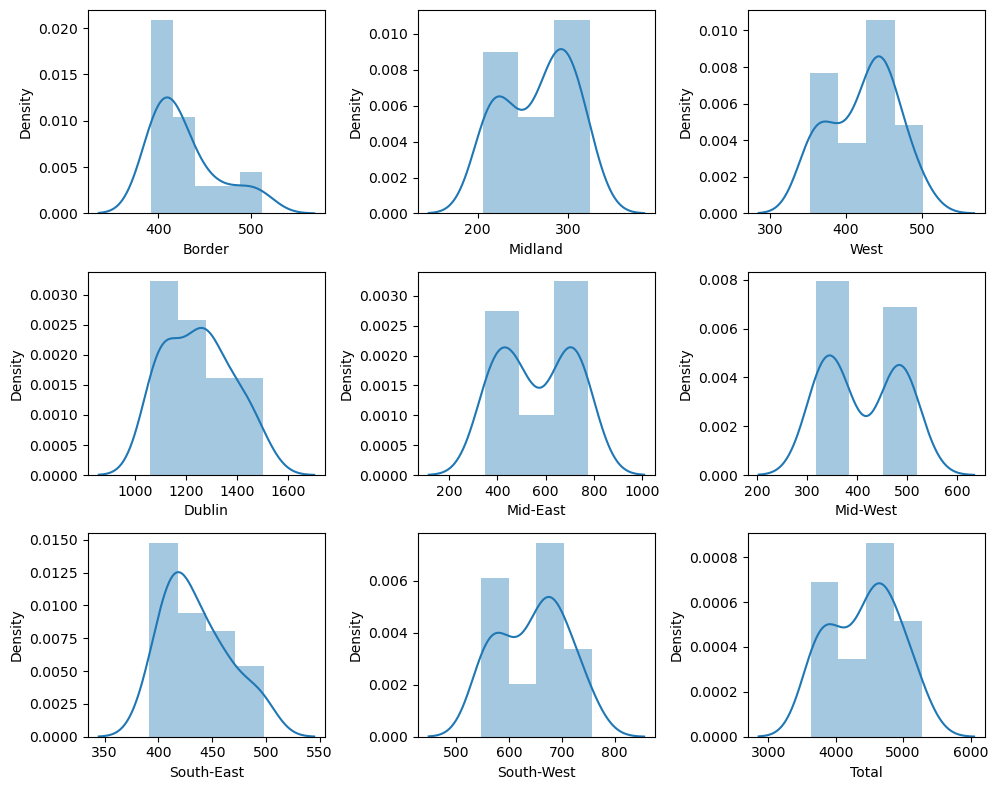

In [15]:
# Create a figure with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(10, 8))

# Plot the distributions on the subplots
sns.distplot(population_df['Border'], ax=axes[0, 0])
sns.distplot(population_df['Midland'], ax=axes[0, 1])
sns.distplot(population_df['West'], ax=axes[0, 2])
sns.distplot(population_df['Dublin'], ax=axes[1, 0])
sns.distplot(population_df['Mid-East'], ax=axes[1, 1])
sns.distplot(population_df['Mid-West'], ax=axes[1, 2])
sns.distplot(population_df['South-East'], ax=axes[2, 0])
sns.distplot(population_df['South-West'], ax=axes[2, 1])
sns.distplot(population_df['Total'], ax=axes[2, 2])


# Tighten the layout of the subplots
plt.tight_layout()

plt.show()

# Insights

    From this figure, we can observe that aside from the Border region, which exhibits a highly positive skew, the skewness of the data is relatively mild. Therefore, it is not necessary to perform any transformations on the data for the purpose of data visualization.
    Lets print the skew value for each region

In [16]:
regions = ('Border','Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West', 'South-East', 'South-West', 'Total')
for region in regions:
    skew = population_df[region].skew()
    print(f"Skewness for {region}: {skew}")

Skewness for Border: 1.12704881302594
Skewness for Midland: -0.2461549651216447
Skewness for West: -0.2442411430432881
Skewness for Dublin: 0.26158561430842864
Skewness for Mid-East: 0.01067482527437623
Skewness for Mid-West: 0.09336379117093796
Skewness for South-East: 0.6409832557315273
Skewness for South-West: -0.08296965759529344
Skewness for Total: -0.10135746011773637


# Outliers

    Outliers are data points significantly different from the rest of the data, Outliers can be caused by errors in data collection or entry, or they can be genuine data points that represent unusual or unexpected events.
    By plotting a boxplot, we can detect outliers.

    There are a number of different methods for detecting outliers. One common approach is to use statistical methods to calculate the mean, median, and standard deviation of the data. Outliers are then identified as data points that fall outside of a certain number of standard deviations from the mean.

    Another approach to detecting outliers is to use 
    visualization methods, such as scatter plots and boxplots. These methods can be used to identify data points that are visually distinct from the rest of the data

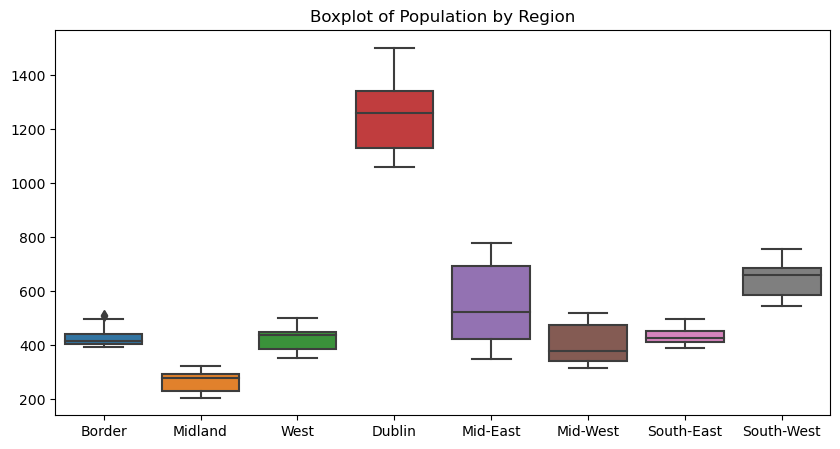

In [17]:
import seaborn as sns 
# Get the columns names using: population_df.columns  and plot the boxplot with specific column

plt.figure(figsize=(10, 5)) # set the figure size
plt.title("Boxplot of Population by Region") # Add a title to the boxplot
sns.boxplot(data=population_df[['Border', 'Midland', 'West', 'Dublin', 'Mid-East', 'Mid-West',
       'South-East', 'South-West']])

# Show the plot
plt.show()

## From this boxplot we can get some Insights:
    The median population of the "Border" region is the highest
    Overall, the boxplot shows that there is a significant variation in population between the different regions. The Border and West regions have the highest populations, while the South-West region has the lowest population.

Here are a question that we can answer based on the boxplot:

    Which region has the highest median population? 
        The Border region has the highest median population.
        
        
## Identifying the outliers in ther Border Region.

To identify potential outliers, we can use statistical methods like Z-score or IQR (Interquartile Range).
    
Using IQR method:

    Calculate the first quartile (Q1) and the third quartile (Q3).
    Calculate the IQR as IQR = Q3 - Q1.
    Define a lower bound as Q1 - 1.5 * IQR and an upper bound as Q3 + 1.5 * IQR.
    Any data points outside these bounds are potential outliers.

In [18]:
#Load the column in a new dataframe "data"
data = population_df['Border']

# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate the IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Using a lambda function to identify potential outliers (any datapoint outside these bounds)
outliers = list(filter(lambda value: value < lower_bound or value > upper_bound, data))

print(f"Potential outliers: {outliers}")
population_df.query('Border > 480')

Potential outliers: [508.2, 511.5]


,Year,Border,Midland,West,Dublin,Mid-East,Mid-West,South-East,South-West,Total,UNIT
11,2007,483.9,262.3,423.2,1231.2,496.0,366.4,475.2,637.6,4375.8,Thousand
12,2008,496.5,270.9,431.1,1252.7,513.4,375.7,489.6,655.2,4485.1,Thousand
13,2009,508.2,275.4,438.1,1258.5,520.8,376.9,495.3,660.3,4533.4,Thousand
14,2010,511.5,279.5,438.4,1259.6,528.4,378.6,498.0,660.8,4554.8,Thousand


# From the Line charts we can get the following insights:

* Trends: we can identify trends, such as whether the population is increasing, decreasing, or remaining stable.
* Relationships: We can identify relationship between two variables.
* Comparisons: We can compare two or more variables over time. This can be useful for identifying differences between regions.


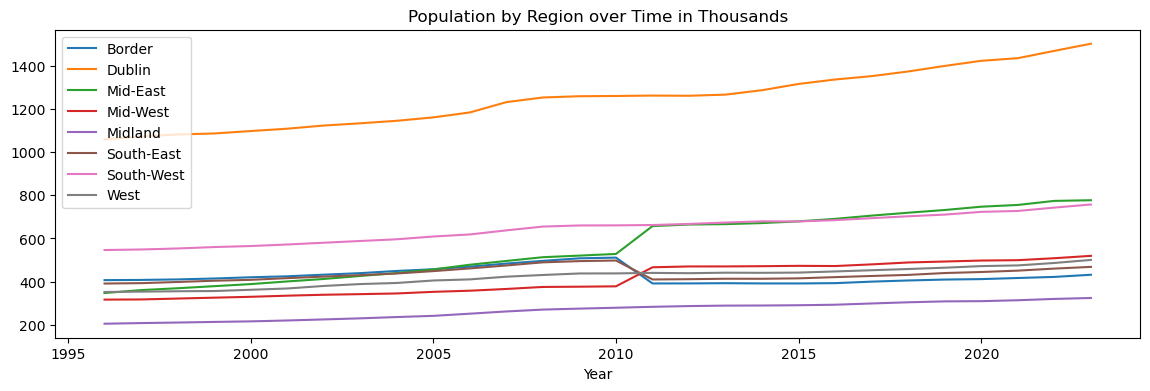

In [19]:
import matplotlib.pyplot as plt

# Resize the chart to be wider
fig, ax = plt.subplots(figsize=(14, 4))

# Here I will plot a line chart of the population growth for each `Region`
population_df.plot(kind='line', x='Year', y=['Border', 'Dublin', 'Mid-East', 'Mid-West', 'Midland', 'South-East', 'South-West',  'West'], ax=ax)

ax.set_title('Population by Region over Time in Thousands')
plt.show()

### Insights:

    One of the most obvious insights is the overall growth of Ireland's population over time, The chart shows the regional variation in population growth. Some regions, such as Dublin and the surrounding counties, have experienced more rapid growth than others. This is due to a number of factors, including economic opportunity and migration.

    Also, its possible observe some anomalies in the lines blue and brown, show the decrease of the population.

    Finally, the chart can provide insights into the future of Ireland's population. By analyzing the trends in population growth, demographers can make predictions about the future size and distribution of the population

# Pie Chart
    From Pie charts we can get following insights:

    Composition: From Pie charts we can get how a whole is divided into its constituent parts.
    Comparisons: We can also compare the population of each region. This can be useful for identifying similarities and differences between different regions.
    Trends: We can also plot more than one Pie chart and observe how it changes over time.

### Note:
    Pie chart need a 1D array as input. so we need to convert the data variable to a 1D array. 
    Using numpy.ravel() function we can flattens a NumPy array into a 1D array.
    
   ###  In this case, I will plot two Pie Carts one with data from 2013 and other with data from 2023:
    From these charts, we can observe any change in 10 years.

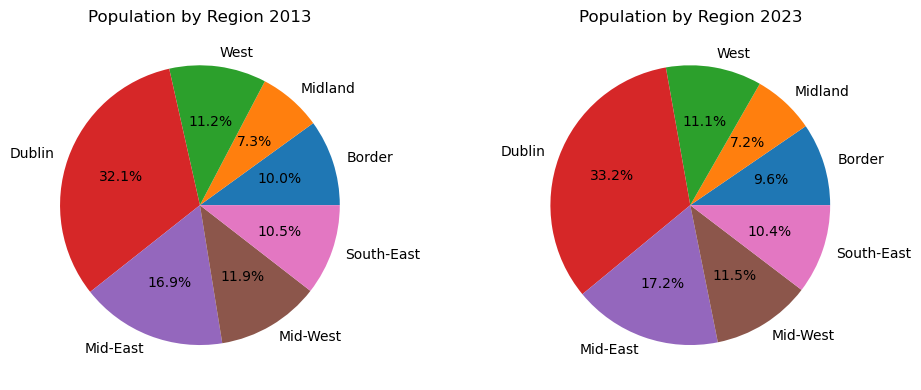

In [19]:
# First I need to create two new dataframes and filter the data with each year.

# Get the data from the table, filtered by date 2013
df_2013 = population_df[population_df['Year'].values == 2013]
df_2013= df_2013.iloc[:,1:8]
df_2013= df_2013.values


# Get the data from the table filtered by 2023.
df_2023 = population_df[population_df['Year'].values == 2023]

df_2023= df_2023.iloc[:,1:8]
df_2023 = df_2023.values


# Flatten the data array into a 1D array
df_2013 = np.ravel(df_2013)
df_2023 = np.ravel(df_2023)


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the 2020 pie chart
axs[0].pie(df_2013, labels=["Border", "Midland", "West", "Dublin", "Mid-East", "Mid-West", "South-East"], autopct="%1.1f%%")
axs[0].set_title('Population by Region 2013')


# Plot the 2023 pie chart
axs[1].pie(df_2023, labels=["Border", "Midland", "West", "Dublin", "Mid-East", "Mid-West", "South-East"], autopct="%1.1f%%")
axs[1].set_title('Population by Region 2023')


# Adjust the subplot layout
plt.tight_layout()

# Show the plot
plt.show()




### Insights:

From the pie chart, we can observe that the biggest region in population Is the Dublin region and the smallest is Midland.
	Comparing both pie charts, we can see the following changes:
  * The Dublin region has become even more populous over the past decade, increasing its population share from 32.1% to 33.2%.
  * The Border region has also experienced a slight increase in population share, from 16.5% to 16.9%.
Overall, the population of Ireland is becoming more concentrated in the Dublin region. This may be due to a number of factors, such as job opportunities, educational opportunities, and cultural amenities.


# Exploring the Recorded crime dataset
    Dataset: CJQ01-recorded_crime_2002-2022.csv"

In [20]:
# cjq01  variable already inicialized at the begining of this notebook.
crime_df=pd.read_csv(cjq01)
crime_df.head()

,STATISTIC Label,Year,Garda Station,Type of Offence,UNIT,VALUE
0,Recorded crime incidents (Under Reservation),2003,"35301 Abbeyfeale, Limerick Division","Attempts/threats to murder, assaults, harassme...",Number,18
1,Recorded crime incidents (Under Reservation),2003,"35301 Abbeyfeale, Limerick Division",Dangerous or negligent acts,Number,14
2,Recorded crime incidents (Under Reservation),2003,"35301 Abbeyfeale, Limerick Division",Kidnapping and related offences,Number,0
3,Recorded crime incidents (Under Reservation),2003,"35301 Abbeyfeale, Limerick Division","Robbery, extortion and hijacking offences",Number,0
4,Recorded crime incidents (Under Reservation),2003,"35301 Abbeyfeale, Limerick Division",Burglary and related offences,Number,27


In [21]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135360 entries, 0 to 135359
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   STATISTIC Label  135360 non-null  object
 1   Year             135360 non-null  int64 
 2   Garda Station    135360 non-null  object
 3   Type of Offence  135360 non-null  object
 4   UNIT             135360 non-null  object
 5   VALUE            135360 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.2+ MB


In [23]:
crime_df.isnull().sum() 

STATISTIC Label    0
Year               0
Garda Station      0
Type of Offence    0
UNIT               0
VALUE              0
dtype: int64

### We can verify wich Garda Station has registered more incidents and which has registered less incidents


In [22]:
# Garda Station that has registered more incidentes
crime_df.groupby(['Garda Station'])['VALUE'].sum().reset_index().sort_values(by='VALUE', ascending = False).head()


,Garda Station,VALUE
525,"61202 Pearse Street, D.M.R. South Central Divi...",194751
531,"62301 Store Street, D.M.R. North Central Division",180778
528,"62101 Bridewell Dublin, D.M.R. North Central D...",119671
548,"64202 Tallaght, D.M.R. Southern Division",116003
556,"66101 Blanchardstown, D.M.R. Western Division",111546


In [23]:
# Garda Station that has registered less incidentes

crime_df.groupby(['Garda Station'])['VALUE'].sum().reset_index().sort_values(by='VALUE', ascending = True).head()


,Garda Station,VALUE
444,"51406 Templederry, Tipperary Division",79
142,"23104 Creggs, Galway Division",156
206,"24506 Taughmaconnell, Roscommon/Longford Division",175
430,"51302 Ballingarry North, Tipperary Division",177
152,"23207 Sraith Salach, Galway Division",184


Also We can see the top 5 most comon type of offence

In [24]:
# Top 5 crimes in ireland:
Offence_grp = crime_df.groupby('Type of Offence')['VALUE'].sum().reset_index().sort_values(by="VALUE", ascending = False)
Offence_grp.head()


,Type of Offence,VALUE
10,Theft and related offences,1416029
8,Public order and other social code offences,848510
3,Damage to property and to the environment,621217
1,Burglary and related offences,442222
0,"Attempts/threats to murder, assaults, harassme...",351382


# Phase 3 -  Statistics


## Crime Rate dataset
Now that we have an overall about the population, lets dive into the crime rate dataframe, using some statistical approach: Lets call it: "crime_df"
        

# libraries:
### For statistics we need to import these libraries (already imported on the begining of this notebook)
     from scipy import stats
     from empiricaldist import Pmf, Cdf
     from matplotlib.ticker import PercentFormatter



In [25]:
from scipy import stats
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter



## The method describe shows important information about the dataset.
    * mean: The average of crime over these types.
    * max: The largest value in the type of crime.
    * median: (middle value) of recorded crime incidents.
    * minimum: and maximum values in the dataset.
    * standard deviation to measure the spread of the data.


In [26]:
crime_df['VALUE'].describe()

count    135360.000000
mean         34.780504
std         143.665041
min           0.000000
25%           1.000000
50%           4.000000
75%          18.000000
max        6523.000000
Name: VALUE, dtype: float64

# Insights

From this “.describe()” method:

*    The average number of crimes in the dataset is 34.78.
*    The standard deviation is 143.66, which means that the number of crimes varies widely.
*    There are a few outliers in the dataset, with the maximum number of crimes being 6523.
*    The median number of crimes is 4, which means that half of the crimes in the dataset are less than or equal to 4, and half are greater than or equal to 4.


# Histogram
    A histogram is a representation of the distribution of a dataset. It groups the data into intervals (bins) and displays the frequency or count of data points within each bin

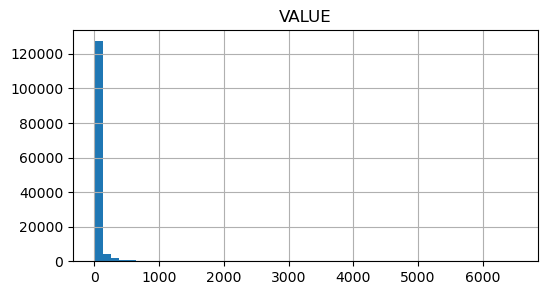

In [27]:
# Adjust the chart size
fig, ax = plt.subplots(figsize=(6, 3))

# Create the histogram
crime_df.hist(column='VALUE', bins=50, ax=ax)

# Show the plot
plt.show()

# Insights:
   
    The distribution of the VALUE column is skewed to the right. This means that there are more values on the right side of the distribution than on the left side.
    The median value of the VALUE column is between 10,000 and 15,000.

# PMF and CDF

Pmf and Cdf are classes that represent probability mass functions (PMFs) and cumulative distribution functions (CDFs), respectively.



# PMF
* A PMF is a function that gives the probability of each possible value of a discrete random variable.


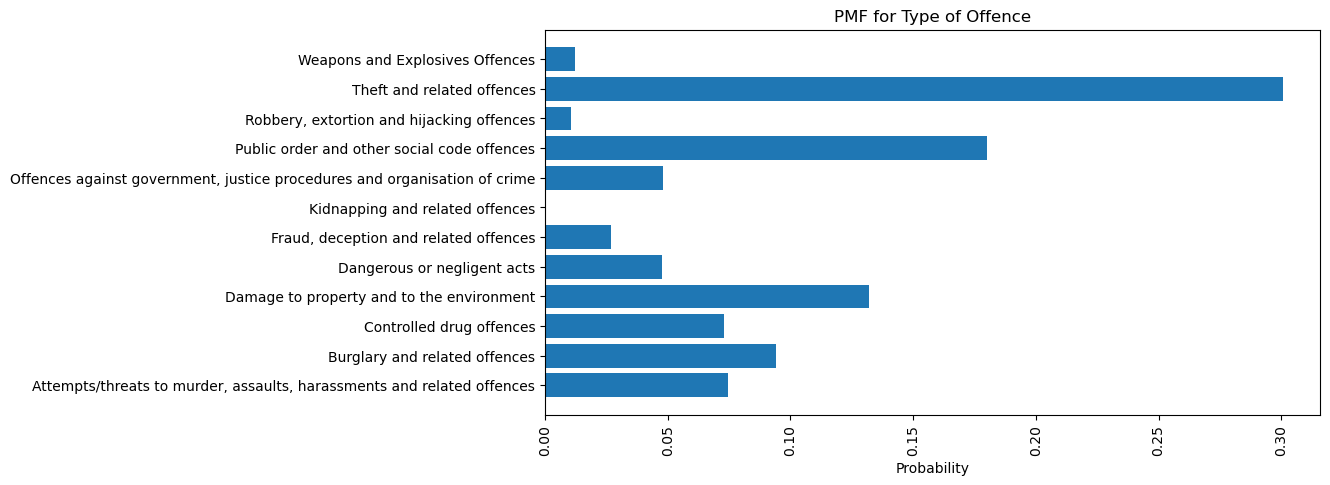

In [28]:
fig,ax=plt.subplots(figsize=(10,5))

# Calculate the weighted counts of 'Offence_ID' using 'VALUE'
weighted_counts = crime_df.groupby('Type of Offence')['VALUE'].sum()

# Calculate the total sum of 'VALUE'
total_value_sum = weighted_counts.sum()

# Calculate the PMF by normalizing the weighted counts
pmf = Pmf(weighted_counts / total_value_sum)

# Create a list of labels for the x-axis based on 'Offence_ID' values
offence_id_labels = [str(offence_id) for offence_id in pmf.index]

# Plot the PMF with labels on the x-axis
plt.barh(offence_id_labels, pmf)
plt.xlabel('Probability')
plt.title('PMF for Type of Offence')
plt.xticks(rotation=90)
plt.show()



### Finding the highest and lowest probability:


In [31]:
# Find the 'Type of Offence' with the highest probability
highest = pmf.sort_values(ascending=False).head(1)
print(f'The highest probability is:\n {highest.index[0]} \n Probability:  {highest.values}')


The highest probability is:
 Theft and related offences 
 Probability:  [0.30077791]


In [30]:
# Find the 'Type of Offence' with the lowest probability
lowest = pmf.sort_values(ascending=True).head(1)
print(f'Type of Offence with the lowest probability: \n {lowest.index[0]} \n Probability: {lowest.values}')


Type of Offence with the lowest probability: 
 Kidnapping and related offences 
 Probability: [0.00049916]


# Insights from this PFM

Based on the PMF chart we canmake the following analyses:

    The most common type of offence is theft and related offences. This is followed by Public order and other social code offences.
    The least common types of offences are kidnapping and related offences.
    The distribution of offences is skewed, with a few types of offences being much more common than others.


# CDF - Cumulative Distribution Function
* A CDF  is a function that gives the probability that a random variable will take on a value less than or equal to a given value.


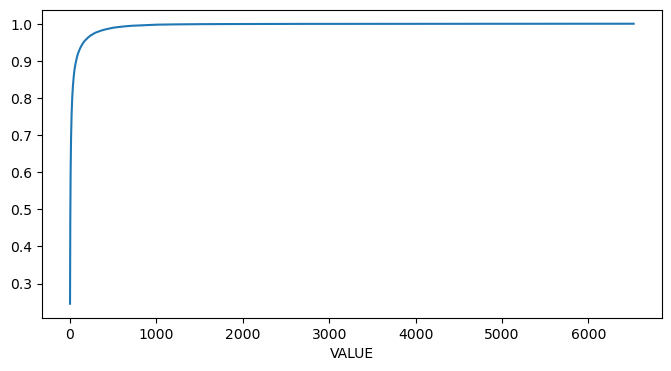

In [32]:
# Calculate CDF
fig,ax=plt.subplots(figsize=(8,4))
cdf=Cdf.from_seq(crime_df['VALUE'])
cdf.plot();

# Insights from the CDF:

    The CDF chart shows that the VALUE column is skewed to the right. This means that there is a relatively small number of crimes with very high values, and a large number of crimes with lower values.
    Most crimes have relatively low values.
    There is a small number of crimes with very high values.



# Analyzing Population Growth and Crime Rate

To perform more in-depth analysis and facilitate comparisons between population growth and crime rates, we must first merge both datasets, population_df and crime_df. However, a crucial preparatory step involves reshaping the crime_df dataset by pivoting the "Type of Offender" column. This transformation will restructure the data in a way that allows for a more insightful examination of the relationships between different offender types, population trends, and crime rates.

# Group and Pivot the crime_df dataset


In [33]:
crime_df = crime_df.groupby(['Year','Type of Offence']).sum('VALUE').reset_index()
crime_df.head()

,Year,Type of Offence,VALUE
0,2003,"Attempts/threats to murder, assaults, harassme...",13536
1,2003,Burglary and related offences,25755
2,2003,Controlled drug offences,9295
3,2003,Damage to property and to the environment,34023
4,2003,Dangerous or negligent acts,11962


In [34]:
# Pivot the crime_df dataset
crime_df = crime_df.pivot_table(index='Year', columns='Type of Offence', values='VALUE')
crime_df.reset_index(inplace=True)
# Creating a new column "Total Crime"
crime_df["Total_Crime"] = crime_df.iloc[:, 1:].sum(axis=1)
crime_df.head()

Type of Offence,Year,"Attempts/threats to murder, assaults, harassments and related offences",Burglary and related offences,Controlled drug offences,Damage to property and to the environment,Dangerous or negligent acts,"Fraud, deception and related offences",Kidnapping and related offences,"Offences against government, justice procedures and organisation of crime",Public order and other social code offences,"Robbery, extortion and hijacking offences",Theft and related offences,Weapons and Explosives Offences,Total_Crime
0,2003,13536,25755,9295,34023,11962,3637,97,6837,45142,2911,73419,1914,228528
1,2004,13272,24898,9914,37037,12669,3176,75,6458,47781,2716,72189,2155,232340
2,2005,13683,26372,13346,39715,14705,3739,74,7787,55483,2423,73033,2553,252913
3,2006,15558,24820,14230,43588,19197,4337,82,9481,56597,2489,74516,3123,268018
4,2007,18139,24011,18522,43276,20728,6274,108,10916,60701,2204,75128,3598,283605


To compare population growth and crime rates, we will filter the population dataframe to extract total population figures between 2003 and 2022, excluding regional data. We must then multiply the population by 1000 to account for the fact that the population is shown in thousands and crimes are shown in units.

In [35]:
# Filtering values from 2003 to 2022
pop_and_crime_df=population_df[(population_df['Year'] >= 2003) & (population_df['Year'] <= 2022)]

# Multiplying by 1000
pop_and_crime_df['Total']=population_df['Total']* 1000

# getting only the columns Year and Total
pop_and_crime_df=pop_and_crime_df.loc[:,['Year','Total']]

# Rename Column Total to Total_Population
pop_and_crime_df.rename(columns={'Total': 'Population_Total'}, inplace=True)

#Merge the two DataFrames on the 'Year' column
pop_and_crime_df = pop_and_crime_df.merge(crime_df, on='Year', how='outer')


In [36]:
pop_and_crime_df.head()

,Year,Population_Total,"Attempts/threats to murder, assaults, harassments and related offences",Burglary and related offences,Controlled drug offences,Damage to property and to the environment,Dangerous or negligent acts,"Fraud, deception and related offences",Kidnapping and related offences,"Offences against government, justice procedures and organisation of crime",Public order and other social code offences,"Robbery, extortion and hijacking offences",Theft and related offences,Weapons and Explosives Offences,Total_Crime
0,2003,3979900.0,13536,25755,9295,34023,11962,3637,97,6837,45142,2911,73419,1914,228528
1,2004,4045200.0,13272,24898,9914,37037,12669,3176,75,6458,47781,2716,72189,2155,232340
2,2005,4133800.0,13683,26372,13346,39715,14705,3739,74,7787,55483,2423,73033,2553,252913
3,2006,4232900.0,15558,24820,14230,43588,19197,4337,82,9481,56597,2489,74516,3123,268018
4,2007,4375800.0,18139,24011,18522,43276,20728,6274,108,10916,60701,2204,75128,3598,283605


### Plotting the evolution of top 5 type of offence over time:

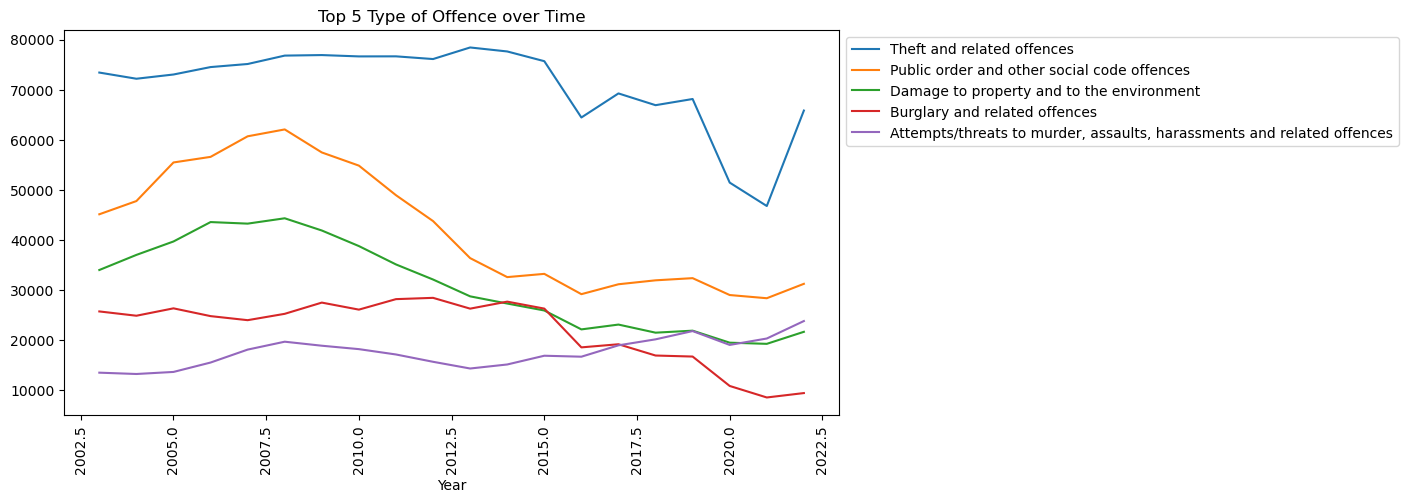

In [37]:
top5 = pop_and_crime_df[['Year','Theft and related offences', 'Public order and other social code offences',
                                                'Damage to property and to the environment',  'Burglary and related offences', 
                                                'Attempts/threats to murder, assaults, harassments and related offences']]

# Resize the chart to be wider
fig, ax = plt.subplots(figsize=(10, 5))

# Here I will plot a line chart of the population growth for each `Region`
top5.plot(kind='line', x="Year", y=['Theft and related offences', 'Public order and other social code offences',
                                                'Damage to property and to the environment',  'Burglary and related offences', 
                                                'Attempts/threats to murder, assaults, harassments and related offences'],  ax=ax)
ax.set_title('Top 5 Type of Offence over Time')
plt.xticks(rotation=90)  
plt.legend(fontsize=8)
#plt.legend(loc='upper left', framealpha=0)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()



### Insights:
The chart shows that all five types of offences have increased over time. Theft and related offences has shown the smallest increase, followed by public order and other social code offences. The other three types of offence have all shown larger increases.
After 2021, all 5 types of offences started to increase, with theft and related offences leading the increase.



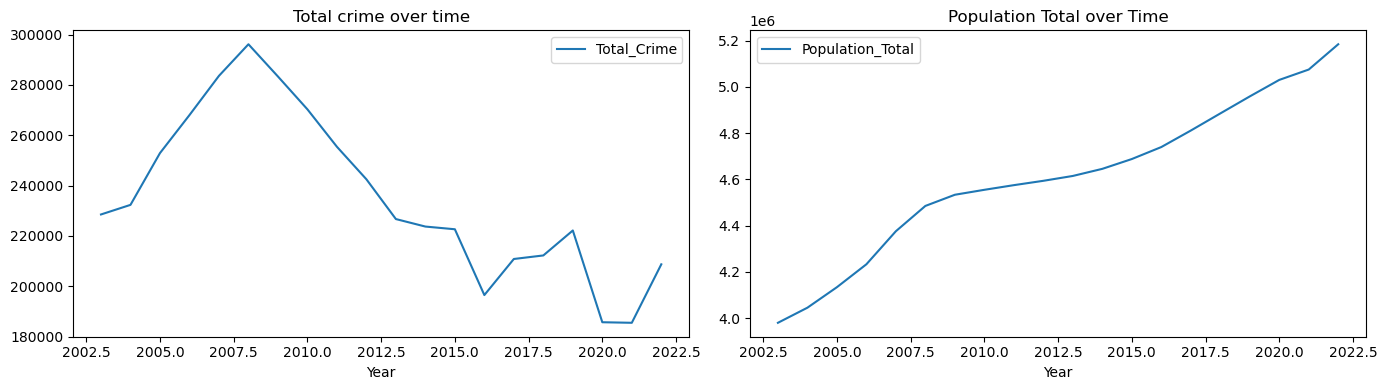

In [38]:
# Create subplots with two axes side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot the first chart on the left axis
pop_and_crime_df.plot(kind='line', x='Year',
                      y=['Total_Crime'], ax=axes[0])

axes[0].set_title('Total crime over time')

# Plot the second chart on the right axis
pop_and_crime_df.plot(kind='line', x='Year', y=['Population_Total'], ax=axes[1])
axes[1].set_title('Population Total over Time')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

# Insight
From the figure above, we can see that the crime rate in Ireland has declined significantly over time, while the population has grown steadily.

This suggests that the crime rate in Ireland has declined even faster than the population has grown. This is a positive development.

# Correlation


To get a better understanding of the relationship between population growth and crime rate, we can calculate the correlation coefficient between the two variables.

,Population_Total,Total_Crime
Population_Total,1.000000,-0.582652
Total_Crime,-0.582652,1.000000


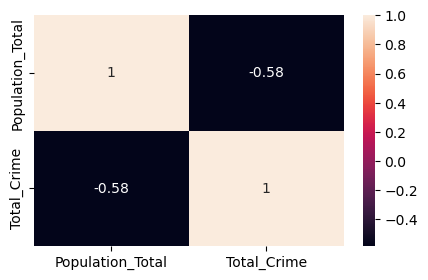

In [39]:
corr_matrix = pop_and_crime_df[["Population_Total","Total_Crime"]].corr()
display(corr_matrix)

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Insigh from Correlation Heatmap

The correlation coefficient for the population growth and crime rate dataset is --0.582652. This indicates a moderate negative correlation between the two variables. This means that as the population increases, the crime rate tends to decrease.


In [40]:
### For Machine Learning, we will save the dataset as csv file.

pop_and_crime_df.to_csv("Pop_and_crime.csv", index=False)


# Phase 4  - Machine Learning

For Machine Learning purpose, we will load the new generated dataset and perform all statistical analysis again (skewness, outliers) and perform some transformation in the data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


# ingnor warnings
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings


pop_and_crime=pd.read_csv("Pop_and_crime.csv")



# Calculate Crime Rate: 
To calculate the crime rate, we need to use the following formula:
Crime Rate = (Total Number of Crimes / Total Population) * 100,000
This formula provides the crime rate per 100,000 people, which is a common way to standardize crime rates for comparison

In [42]:
# Creating a new column with the crime_rate per 1000.000
pop_and_crime['crime_rate'] = (pop_and_crime['Total_Crime']/pop_and_crime['Population_Total'])* 100
pop_and_crime.head()

,Year,Population_Total,"Attempts/threats to murder, assaults, harassments and related offences",Burglary and related offences,Controlled drug offences,Damage to property and to the environment,Dangerous or negligent acts,"Fraud, deception and related offences",Kidnapping and related offences,"Offences against government, justice procedures and organisation of crime",Public order and other social code offences,"Robbery, extortion and hijacking offences",Theft and related offences,Weapons and Explosives Offences,Total_Crime,crime_rate
0,2003,3979900.0,13536,25755,9295,34023,11962,3637,97,6837,45142,2911,73419,1914,228528,5.742054
1,2004,4045200.0,13272,24898,9914,37037,12669,3176,75,6458,47781,2716,72189,2155,232340,5.743597
2,2005,4133800.0,13683,26372,13346,39715,14705,3739,74,7787,55483,2423,73033,2553,252913,6.118172
3,2006,4232900.0,15558,24820,14230,43588,19197,4337,82,9481,56597,2489,74516,3123,268018,6.331782
4,2007,4375800.0,18139,24011,18522,43276,20728,6274,108,10916,60701,2204,75128,3598,283605,6.481215


# Outliers
In the Machine Learning phase, it is crucial to address skewness, handle outliers, and standardize the data.
To identify potential outliers, statistical methods like the Z-score or the Interquartile Range (IQR) can be employed. 
Considering that this dataset is highly skewed, the IQR method is the more appropriate choice for identifying potential outliers.



In [43]:
# Function to calculate and return the index of a row that has outliers.
def iqr(df,coluumn):
    data = pop_and_crime[column]

    # Calculate the first quartile (Q1) and the third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # return a index of a row that has a value smaller than lower_bound or bigger than upper_bound
    return (df.index[(df[column] < lower_bound) | (df[column] > upper_bound)])


# A for loop to chech in each column and add to a list the index of the outliers
outliers_index=[]
# For each column in the pop_and_crime dataframe
for column in pop_and_crime.columns:
  
    # this code call the function outliers, and add in the list (.extend) the return of the function.
    outliers_index.extend(iqr(pop_and_crime, column))

outliers_df=pop_and_crime.iloc[outliers_index]
outliers_df.drop_duplicates()


,Year,Population_Total,"Attempts/threats to murder, assaults, harassments and related offences",Burglary and related offences,Controlled drug offences,Damage to property and to the environment,Dangerous or negligent acts,"Fraud, deception and related offences",Kidnapping and related offences,"Offences against government, justice procedures and organisation of crime",Public order and other social code offences,"Robbery, extortion and hijacking offences",Theft and related offences,Weapons and Explosives Offences,Total_Crime,crime_rate
4,2007,4375800.0,18139,24011,18522,43276,20728,6274,108,10916,60701,2204,75128,3598,283605,6.481215
18,2021,5074700.0,20352,8587,20022,19288,8281,17091,150,12268,28390,1734,46791,2526,185480,3.654994
19,2022,5184000.0,23838,9465,17287,21689,8211,11646,156,14631,31264,2068,65839,2624,208718,4.026196
16,2019,4958500.0,21839,16752,21310,21917,8702,7919,127,18025,32396,2344,68144,2687,222162,4.480428
17,2020,5029900.0,19073,10885,23127,19520,8746,7851,133,10968,29028,1822,51461,3088,185702,3.691962


# Skewness

As we have more columns, I've implemented a for loop to identify and print the skewness only when it exceeds the threshold.
For machine learning, its importante to handle the skewness.


In [44]:
# Loop to get the column names and their skewness
for column in pop_and_crime.columns:
    skew = pop_and_crime[column].skew()
    if skew < -1 or skew > 1:
        print(f"{column} : {skew}")

Burglary and related offences : -1.0882021267868254
Dangerous or negligent acts : 1.1508069099460827
Fraud, deception and related offences : 2.5395603971156238
Theft and related offences : -1.8319521659963909


# Outliers vs Skewness
As a result, we have 4 skewed columns, with some right skewness and others left skewness. Also, we can observe that there are 5 rows with outliers.
Considering that the dataframe contains 20 rows, removing outliers would eliminate 5 rows. In this scenario, the preferred approach is to transform the data to mitigate skewness rather than removing outliers.


As we will use regression to predict the crime rate, it is necessary to transform the skewed data to handle the skew.

Linear regression assumes that the data is normally distributed, and skewed data can violate this assumption. This can lead to inaccurate predictions and unreliable results.


# Function handleskew
To handle skewness I've created a function handleskew, to run the transformation methods and after choose the best approach.


In [45]:
import sklearn.preprocessing as preproc
from sklearn.preprocessing import normalize
def handleskew(df,method):
        
    # This Loop will apply the square root in each column that is right skewed.
    for column in df.columns:
        skew = df[column].skew()
        if skew > 1:
            if method == 'sqrt':
                df[column]=np.sqrt(df[column])
            elif method == 'log':
                df[column]=np.log(df[column])
            elif method == 'cube':
                df[column]=np.cbrt(df[column])
            elif method == 'reciprocal':
                df[column]=np.reciprocal(df[column])
          
        elif skew < -1:
            if method == 'square':
                df[column]=np.square(df[column])
            elif method == 'cubes':
                df[column]=np.power(df[column],3)


    results = []
    # Loop to get the column names and their skewness
    for column in df.columns:
        skew = df[column].skew()
        if skew < -1 or skew > 1:
            results.append([column, skew])

    # Return a datagrame from the results
    return (pd.DataFrame(results, columns=['Column','Skewness']).sort_values(by='Skewness'))




### Its important to create a new dataframe to test the methods to handle skewness, so that, we will apply the best option only in the original dataframe

### Square Root Transformation:

In [46]:
test_skewness=pd.read_csv("Pop_and_crime.csv")
display(handleskew(test_skewness,'sqrt'))

test_skewness[['Burglary and related offences','Dangerous or negligent acts','Fraud, deception and related offences','Theft and related offences']].head()

,Column,Skewness
2,Theft and related offences,-1.831952
0,Burglary and related offences,-1.088202
1,"Fraud, deception and related offences",1.941565


,Burglary and related offences,Dangerous or negligent acts,"Fraud, deception and related offences",Theft and related offences
0,25755,109.370928,60.307545,73419
1,24898,112.556652,56.356011,72189
2,26372,121.264174,61.147363,73033
3,24820,138.553239,65.855903,74516
4,24011,143.972220,79.208585,75128


### Cube Root Transformation:

In [47]:
test_skewness=pd.read_csv("Pop_and_crime.csv")

display(handleskew(test_skewness,'cube'))


test_skewness[['Burglary and related offences','Dangerous or negligent acts','Fraud, deception and related offences','Theft and related offences']].head()

,Column,Skewness
2,Theft and related offences,-1.831952
0,Burglary and related offences,-1.088202
1,"Fraud, deception and related offences",1.721015


,Burglary and related offences,Dangerous or negligent acts,"Fraud, deception and related offences",Theft and related offences
0,25755,22.870093,15.378516,73419
1,24898,23.312067,14.699193,72189
2,26372,24.499375,15.520957,73033
3,24820,26.775923,16.307841,74516
4,24011,27.469608,18.443705,75128


### Log  Transformation:

In [48]:
test_skewness=pd.read_csv("Pop_and_crime.csv")

display(handleskew(test_skewness,'log'))


test_skewness[['Burglary and related offences','Dangerous or negligent acts','Fraud, deception and related offences','Theft and related offences']].head()

,Column,Skewness
2,Theft and related offences,-1.831952
0,Burglary and related offences,-1.088202
1,"Fraud, deception and related offences",1.258313


,Burglary and related offences,Dangerous or negligent acts,"Fraud, deception and related offences",Theft and related offences
0,25755,9.389490,8.198914,73419
1,24898,9.446913,8.063378,72189
2,26372,9.595943,8.226573,73033
3,24820,9.862509,8.374938,74516
4,24011,9.939241,8.744169,75128


### Reciprocal Transformation:

In [49]:
test_skewness=pd.read_csv("Pop_and_crime.csv")

display(handleskew(test_skewness,'reciprocal'))

test_skewness[['Burglary and related offences','Dangerous or negligent acts','Fraud, deception and related offences','Theft and related offences']].head()

,Column,Skewness
1,Theft and related offences,-1.831952
0,Burglary and related offences,-1.088202


,Burglary and related offences,Dangerous or negligent acts,"Fraud, deception and related offences",Theft and related offences
0,25755,0,0,73419
1,24898,0,0,72189
2,26372,0,0,73033
3,24820,0,0,74516
4,24011,0,0,75128


In [50]:
# Applying first Log and after Reciprocal
test_skewness=pd.read_csv("Pop_and_crime.csv")
handleskew(test_skewness,'log') 
handleskew(test_skewness,'reciprocal')

,Column,Skewness
1,Theft and related offences,-1.831952
0,Burglary and related offences,-1.088202


In [51]:
test_skewness[['Burglary and related offences','Dangerous or negligent acts','Fraud, deception and related offences','Theft and related offences']].head()

,Burglary and related offences,Dangerous or negligent acts,"Fraud, deception and related offences",Theft and related offences
0,25755,9.389490,0.121967,73419
1,24898,9.446913,0.124018,72189
2,26372,9.595943,0.121557,73033
3,24820,9.862509,0.119404,74516
4,24011,9.939241,0.114362,75128


I've applyed three method to mitigate the skewness, each one had a result, but not efective. The best solution was applying the Log trasnformation first, and after applying the reciprocal.

# Left Skewness

Now we have olny the columns with negative skew (left skew) and for left skew, we have some transformation methods:
* Square Transformation;
* Cubes Transformation;
* Box-Cox Transformation.

### Square Transformation

In [52]:
test_skewness=pd.read_csv("Pop_and_crime.csv")
display(handleskew(test_skewness,'square'))


,Column,Skewness
2,Theft and related offences,-1.574334
0,Dangerous or negligent acts,1.150807
1,"Fraud, deception and related offences",2.539560


### Cubes Transformation

In [53]:
test_skewness=pd.read_csv("Pop_and_crime.csv")

display(handleskew(test_skewness,'cubes'))


,Column,Skewness
2,Theft and related offences,-1.329735
0,Dangerous or negligent acts,1.150807
1,"Fraud, deception and related offences",2.539560


Applying square or cube transformation was effective at reducing skewness, but it was not enough to fully adjust the highly skewed column. The best option is to apply both transformations.

In [54]:
test_skewness=pd.read_csv("Pop_and_crime.csv")
display(handleskew(test_skewness,'square'))
display(handleskew(test_skewness,'cubes'))
test_skewness[['Burglary and related offences','Dangerous or negligent acts','Fraud, deception and related offences','Theft and related offences']].head()

,Column,Skewness
2,Theft and related offences,-1.574334
0,Dangerous or negligent acts,1.150807
1,"Fraud, deception and related offences",2.539560


,Column,Skewness
0,Dangerous or negligent acts,1.150807
1,"Fraud, deception and related offences",2.539560


,Burglary and related offences,Dangerous or negligent acts,"Fraud, deception and related offences",Theft and related offences
0,663320025,11962,3637,-2336665611424272983
1,619910404,12669,3176,-4331145008425603367
2,695482384,14705,3739,-9104654418423945359
3,616032400,19197,4337,3540070919973670912
4,576528121,20728,6274,964180094153392128


### Applying log and reciprical  transformation will mitigate completely the skewness.

In [55]:
handleskew(pop_and_crime,'log')
handleskew(pop_and_crime,'reciprocal')
handleskew(pop_and_crime,'square')
handleskew(pop_and_crime,'cubes')

,Column,Skewness


# Principal Component Analysis (PCA):
As we now have a dataset with 16 columns, it is a good approach to reduce the  dimension,  For this we can use PCA technique. It will simplify the complexity while preserving its essential structure.

In [56]:
pop_and_crime.shape

(20, 16)

# Install libraries
For PCA, it is necessary to install the following libraries:
   * PCA 
   * joblib

In [57]:
# To install, uncomment the lines below and run each command just once:
#!pip install PCA
#!pip install joblib

To apply pca, we need to distribute the features and the target.
* Features (X)
* Target (y)

In [66]:
# distributing the dataset into two components X and Y
X = pop_and_crime.iloc[:, :-1].values
y = pop_and_crime.iloc[:, -1].values


# Splitting the X and Y into the Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X.shape, y.shape,X_train.shape, X_test.shape, y_train.shape, y_test.shape


((20, 15), (20,), (15, 15), (5, 15), (15,), (5,))

### Apply PCA with 10 n_components to evaluate wich will be the best components number
    
    Import libraries: StandardScaler and PCA
    Standardize the data

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)


# Inicialise a PCA with 10 n_components
pca = PCA(n_components = 10)

# Transform the data into traning and testing
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
# Store the explauned variance
explained_variance = pca.explained_variance_ratio_


list = explained_variance
print(list.sum()*100,"%")


99.94551099244832 %


# Display PCA components

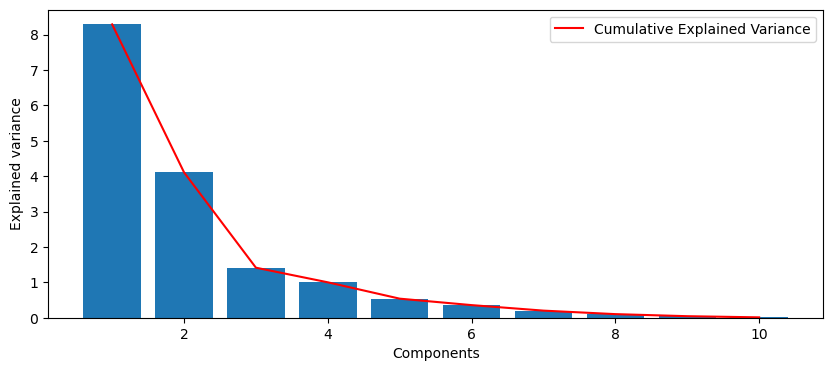

In [68]:

plt.figure(figsize=(10, 4))
plt.bar(range(1,len(pca.explained_variance_ ) + 1), pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_,
         c = 'red',
         label = "Cumulative Explained Variance")
plt.legend(loc = 'best')
plt.show()



Based on this chart, we can assume that the best number of componets is 5, because from 1 to 5 they explain over 90% of the variance in the data. After 5 components, the variance explained by each additional component drops off sharply, indicating that these components are not capturing much important information.

Now We have the best number of components, we will apply in the features:

In [69]:
# distributing the dataset into two components X and Y
X = pop_and_crime.iloc[:, 0:-1].values
y = pop_and_crime.iloc[:, -1].values


# Splitting the X and Y into the Training set and Testing set
from sklearn.model_selection import train_test_split

# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X.shape, y.shape,X_train.shape, X_test.shape, y_train.shape, y_test.shape



((20, 15), (20,), (15, 15), (5, 15), (15,), (5,))

In [70]:
# Applying PCA function on training and testing set of X component
from sklearn.decomposition import PCA

# Create and initialise an object (pca) by calling a method PCA
pca = PCA(n_components = 5)

# Transform the data into traning and testing
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
# Store the explauned variance
explained_variance = pca.explained_variance_ratio_


list = explained_variance
print(list.sum()*100,"%")

100.0 %


## Predicting the Crime Rate:
# Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

# Initialise an object slr by calling a method named as 'LinearRegression()'
lr = LinearRegression()

# Trian the model
lr.fit(X_train, y_train)

# Predict the results for the training and testing
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)




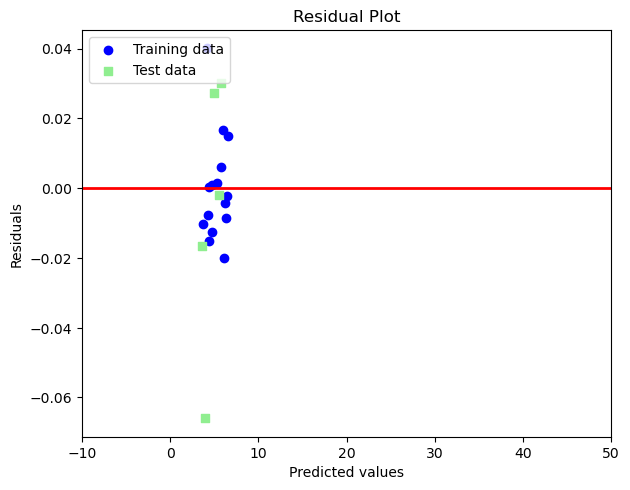

In [72]:
# Display the graph for the training and testing of the data
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.title("Residual Plot")
plt.show()


The residual plot shows that the residuals for linear regression model are randomly scattered around the zero line. This indicates that the model is a good fit for the data

In [73]:
# Calculate the r2_score and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Display the means squared error and r2 score values
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))


MSE train: 0.000, test: 0.001
R^2 train: 1.000, test: 0.998


Based on the MSE and R^2 scores, thislinear regression model is performing very well on both the training and test sets.


# Lasso Regression

In [74]:
from sklearn.linear_model import Lasso

# Fit X_train and u_train
lasso = Lasso().fit(X_train, y_train)



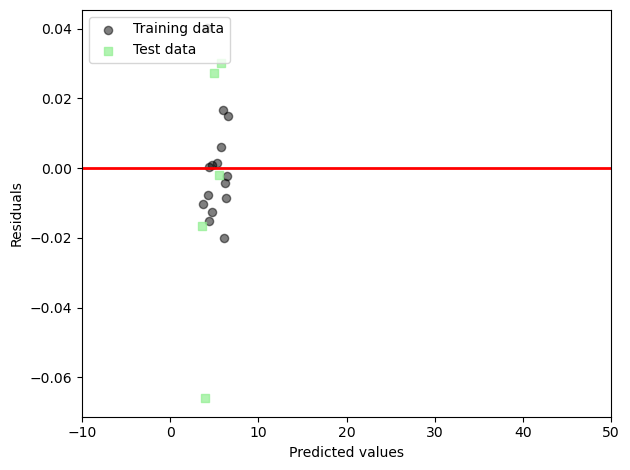

In [75]:
# Draw a scatter plot
plt.scatter(y_train_pred, y_train_pred - y_train,c = 'black',marker = 'o',s = 35,alpha = 0.5,label = 'Training data')
plt.scatter(y_test_pred,y_test_pred - y_test,c = 'lightgreen',marker = 's',s = 35,alpha = 0.7,label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.tight_layout()


In [190]:
# Calculate the r2_score and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00


Similar to Linear Regression, Lasso regression also had a very good result. The training set score and test set score are both 1.00, which means that the model is perfectly fitting the data.

### Applying Random Forest Regressor

In [76]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Select the features and target
X = pop_and_crime[['Year', 'Population_Total']]
y = pop_and_crime['crime_rate']



sc = StandardScaler()

# Train the model by calling a method fit_transform()
X = sc.fit_transform(X)

# Create and fit the random forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Make predictions
y_pred = rf_model.predict(X)
y_pred

array([5.78255246, 5.78316987, 6.06912443, 6.32422827, 6.46529938,
       6.50141204, 6.23401208, 5.91177211, 5.60579956, 5.26834778,
       5.01079349, 4.82401097, 4.71027617, 4.27720849, 4.32423008,
       4.35557837, 4.32089749, 3.81936287, 3.72445886, 3.89782983])

In [78]:
# Evaluating the model - random forest regressor
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'MSE: {mse:.8f}')
print(f'R-squared: {r2:.8f}')

MSE: 0.00563426
R-squared: 0.99359531


MSE score of 0.00563426 is very low and  R-squared score of 0.99359531 is very high, it means that the model is explaining 99.32% of the variation in the target variable.


##   Training and using a trained Model to make prediction

Applying Linear Regressino with 2 features (year and popularion total) and predict crime_rate,  after apply the model to predict the crime rate up to 2030

After Understanding PCA e Linear Regression,  we will now use only the principal features of our datasets to predict population growth and crime rates.
First, we will use our population data from 1996 to 2023 to predict population growth for the next 8 years. Then, we will use this result as an input to a linear regression model to predict crime rates for the next 8 years. 


## Implementing  a simple regression model to predict popularion growth

In [80]:
# loading Feature and target
X = pop_and_crime['Year'].values
y = pop_and_crime['Population_Total'].values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
# Splitting the X and Y into the Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X.shape, y.shape,X_train.shape, X_test.shape, y_train.shape, y_test.shape


((20, 1), (20, 1), (15, 1), (5, 1), (15, 1), (5, 1))

In [81]:
from sklearn.linear_model import LinearRegression
lr_pop = LinearRegression()
lr_pop.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = lr_pop.predict(X_test)
y_pred

array([[4125419.43543154],
       [5008941.20700844],
       [4904997.46917586],
       [4177391.30434783],
       [4541194.38676184]])

### Plotting the Training Set

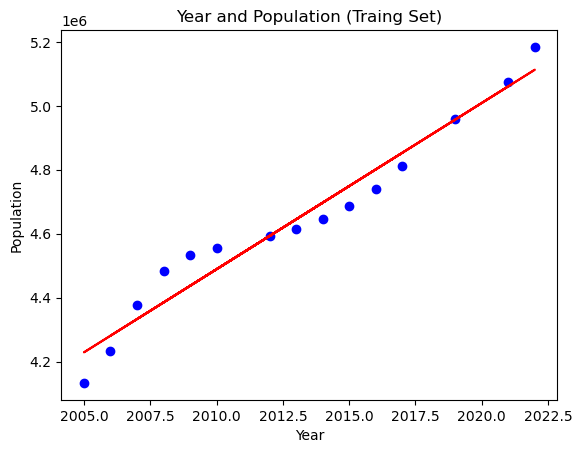

In [83]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, lr_pop.predict(X_train), color = 'red')
plt.title('Year and Population (Traing Set)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()


In [84]:
# Predict the results for the training and testing
y_train_pred = lr_pop.predict(X_train)
y_test_pred = lr_pop.predict(X_test)
y_train_pred,y_test_pred

(array([[4385278.78001298],
        [4697109.99351071],
        [4281335.0421804 ],
        [5060913.07592472],
        [4956969.33809215],
        [4801053.73134328],
        [4229363.17326412],
        [4593166.25567813],
        [5112884.94484101],
        [4333306.91109669],
        [4749081.862427  ],
        [4489222.51784556],
        [4645138.12459442],
        [4853025.60025957],
        [4437250.64892927]]),
 array([[4125419.43543154],
        [5008941.20700844],
        [4904997.46917586],
        [4177391.30434783],
        [4541194.38676184]]))

### Plotting the Test results

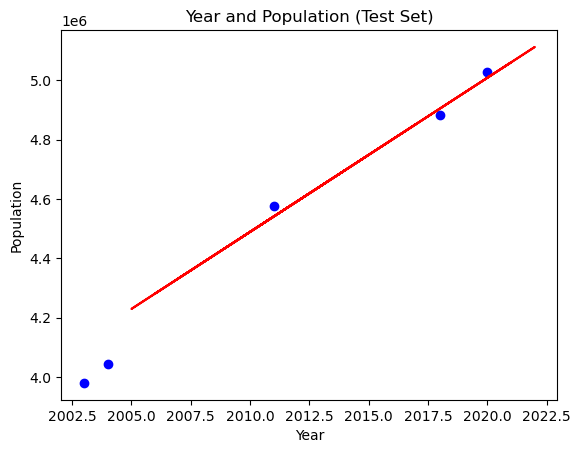

In [85]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, lr_pop.predict(X_train), color = 'red')
plt.title('Year and Population (Test Set)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()


In [86]:
# Calculate the r2_score and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Display the means squared error and r2 score values
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 3663358053.645, test: 8125938933.638
R^2 train: 0.953, test: 0.955


## Implementing Lasso Regression model to predict Crime Rate

In [87]:
# Importing libraries
from sklearn.model_selection import train_test_split

# distributing the dataset into two components X and Y
X = pop_and_crime[['Year', 'Population_Total']]
y = pop_and_crime[['crime_rate']]

# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [88]:
from sklearn.linear_model import Lasso
lasso_crime = Lasso().fit(X_train, y_train)
y_pred = lasso_crime.predict(X_test)
y_pred

array([3.99938194, 6.63010579, 3.72008314, 5.27654151])

In [89]:
# Printing the score results
print("Training set score: {:.2f}".format(lasso_crime.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_crime.score(X_test, y_test)))


Training set score: 0.62
Test set score: 0.68


### Predicting popularion for the next 8 years

In [91]:
# Create a list of years from 2023 to 2030
years = np.array(range(2023, 2031))
years = years.reshape(-1, 1)
years


array([[2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030]])

In [92]:
predic_pop=lr_pop.predict(years)

print("Predicted population values for years 2023 to 2030:")
predic_pop


Predicted population values for years 2023 to 2030:


array([[5164856.8137573 ],
       [5216828.68267359],
       [5268800.55158988],
       [5320772.42050616],
       [5372744.28942245],
       [5424716.15833874],
       [5476688.02725503],
       [5528659.89617132]])

## Now with Year and Population, we will predict the Total of Crimes for the next 8 years.

In [93]:
# Select the main features - year, Population_total  to predict the target crime_rate
X = pop_and_crime[['Year', 'Population_Total']]
y = pop_and_crime[['crime_rate']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Standardize the data

In [98]:
# Apply StandardScaler to feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create and fit the linear regression model
lr_crime = LinearRegression()
lr_crime.fit(X_train, y_train)

# Make predictions
y_pred = lr_crime.predict(X_test)


In [100]:
# Evaluate the model
# Calculate the r2_score and mean squared error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 0.15206557504607568
R-squared: 0.8091248360031882


In [101]:
pop=pd.DataFrame()
pop['Year']=pd.DataFrame(years)
pop['Population_Total']=pd.DataFrame(predic_pop)   
pd.options.display.float_format = '{:.2f}'.format
pop


,Year,Population_Total
0,2023,5164856.81
1,2024,5216828.68
2,2025,5268800.55
3,2026,5320772.42
4,2027,5372744.29
5,2028,5424716.16
6,2029,5476688.03
7,2030,5528659.90


### Predict the crime rate using Lasso Regression

In [102]:
crime_rate=lasso_crime.predict(pop)
crime_rate

array([3.76900051, 3.63619465, 3.50338879, 3.37058292, 3.23777706,
       3.1049712 , 2.97216534, 2.83935948])

In [103]:

predict = pd.DataFrame(pop)
predict["crime_rate"]= crime_rate
predict

,Year,Population_Total,crime_rate
0,2023,5164856.81,3.77
1,2024,5216828.68,3.64
2,2025,5268800.55,3.50
3,2026,5320772.42,3.37
4,2027,5372744.29,3.24
5,2028,5424716.16,3.10
6,2029,5476688.03,2.97
7,2030,5528659.90,2.84


As a result, using linear regression and lasso regression, we could predict well that crime rates would decline over the next seven years. This is a positive trend, and it suggests that the model is able to identify factors that are contributing to the current crime rate and that these factors are likely to change in the future.

# Analyzing the Relationship between Population Growth and Crime Rates from 2003 to 2030: Utilizing Predictive Data

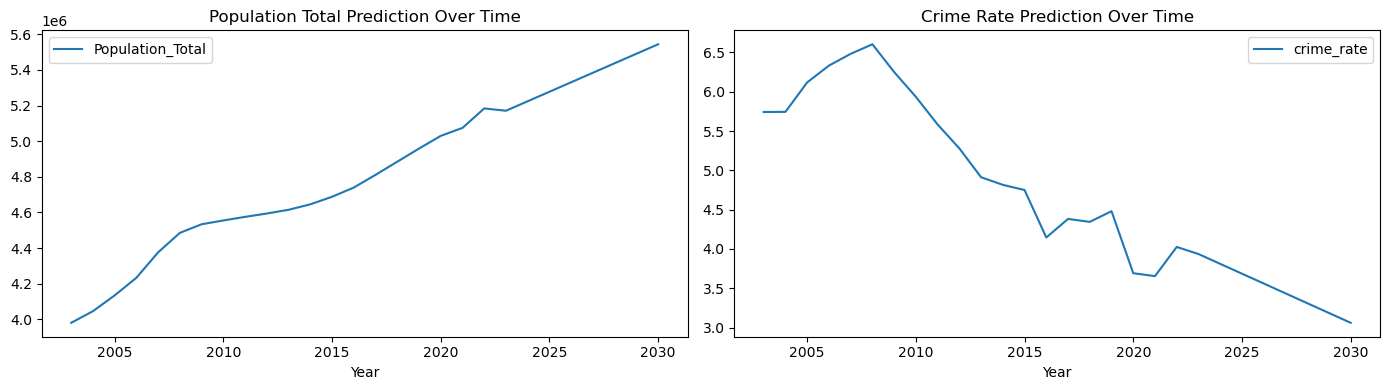

In [168]:
full_predict=pd.concat([pop_and_crime[['Year','Population_Total','crime_rate']], predict],ignore_index=True)


# Create subplots with two axes side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot the first chart on the left axis
full_predict.plot(kind='line', x='Year', y=['Population_Total'], ax=axes[0])

axes[0].set_title('Population Total Prediction Over Time')

# Plot the second chart on the right axis
full_predict.plot(kind='line', x='Year', y=['crime_rate'], ax=axes[1])
axes[1].set_title('Crime Rate Prediction Over Time')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

By examining historical data and employing sophisticated forecasting techniques, we could predict the impact of population growth on crime rates in the next years.